In [1]:
%matplotlib inline
from __future__ import print_function

import numpy as np
import keras
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers.core import Dense, Flatten
from keras import backend as K
from loader import load_dataset
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Data Paths

#full = 'data/dogsvcats.hdf5'
#X_train_orig, Y_train_orig, X_val_orig, Y_val_orig, X_test_orig, Y_test_orig = load_dataset(full)

#sample = 'data/dogsvcats-sample.hdf5'
#X_train_orig, Y_train_orig, X_val_orig, Y_val_orig, X_test_orig, Y_test_orig = load_dataset(sample)

train_path = 'data/sample/train/'
valid_path = 'data/sample/valid'
test_path = 'data/sample/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dogs', 'cats'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dogs', 'cats'], batch_size=2)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dogs', 'cats'], batch_size=10)

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
def plot(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')    

In [5]:
imgs, labels = next(train_batches)

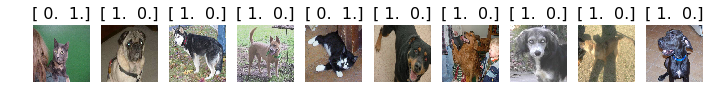

In [6]:
plot(imgs, titles=labels)

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)), Flatten(), Dense(2, activation='softmax'),])

In [8]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=20, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
 - 5s - loss: 8.0487 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 6s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


In [10]:
test_imgs, test_labels = next(test_batches)

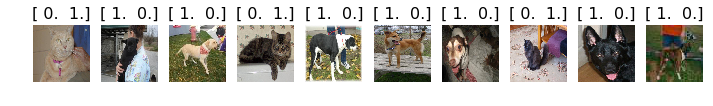

In [11]:
plot(test_imgs, titles=test_labels)

In [12]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [25]:
model = ResNet50()

In [26]:
type(model)

keras.engine.training.Model

In [27]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [28]:
model.layers.pop()

In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [30]:
for layer in model.layers:
    layer.trainable = False

In [31]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [32]:
x = model.output

In [33]:
x = Dense(2, activation='softmax')(x)

In [34]:
mymodel = Model(input=model.input, output=x)

/Users/anirvan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [35]:
mymodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [36]:
mymodel.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
mymodel.fit_generator(train_batches, steps_per_epoch=20, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
 - 35s - loss: 0.6889 - acc: 0.6750 - val_loss: 0.6724 - val_acc: 0.8000
Epoch 2/5
 - 35s - loss: 0.6791 - acc: 0.8400 - val_loss: 0.6631 - val_acc: 0.8500
Epoch 3/5
 - 35s - loss: 0.6677 - acc: 0.9000 - val_loss: 0.6550 - val_acc: 0.9000
Epoch 4/5
 - 35s - loss: 0.6596 - acc: 0.9100 - val_loss: 0.6514 - val_acc: 0.9000
Epoch 5/5
 - 35s - loss: 0.6515 - acc: 0.9650 - val_loss: 0.6481 - val_acc: 0.9000


In [38]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [39]:
predictions

array([[  2.48493421e-07,   8.65297736e-08,   1.04179421e-07, ...,
          8.85459528e-08,   6.31478940e-08,   7.85082932e-08],
       [  1.47091928e-09,   1.11934295e-09,   1.29245690e-08, ...,
          6.95914215e-09,   1.31291600e-07,   1.05836717e-08],
       [  2.68239067e-08,   4.28346292e-09,   8.53563478e-08, ...,
          1.01548750e-07,   1.34544536e-08,   4.51648333e-07],
       ..., 
       [  1.47753451e-06,   7.05993273e-07,   1.31332135e-05, ...,
          2.39433888e-07,   7.37915570e-07,   1.86079589e-07],
       [  4.07981645e-07,   5.39052223e-07,   8.78042954e-08, ...,
          9.09056581e-08,   1.00229909e-06,   1.25102379e-05],
       [  1.17786341e-08,   2.05650963e-08,   4.76571982e-09, ...,
          2.20346874e-09,   6.85509107e-08,   8.00336329e-06]], dtype=float32)